# Data Science Project
# Sadik Ansari
# Project Title - Predict Salary based on YearsExperience

In [1]:
# import all the library
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# read the dataset using pandas
data= pd.read_csv("Salary_Data.csv")

In [3]:
# This displays the top 5 rows of the data
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [4]:
# Provides some information regarding the columns in the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [5]:
# this describes the basic stat behind the dataset used 
data.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


array([[<AxesSubplot:title={'center':'YearsExperience'}>,
        <AxesSubplot:title={'center':'Salary'}>]], dtype=object)

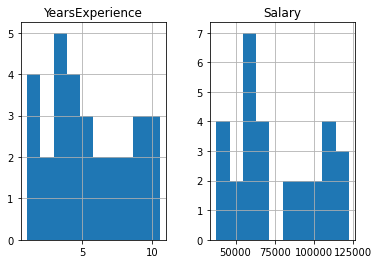

In [6]:
# histogram
data.hist()

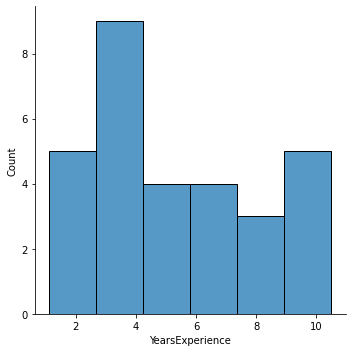

In [7]:
sns.displot(data["YearsExperience"])

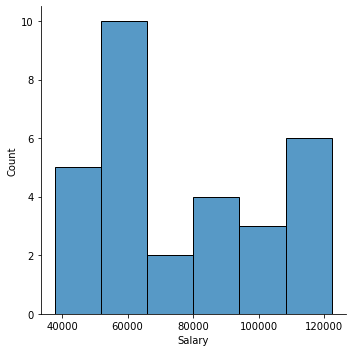

In [8]:
sns.displot(data["Salary"])

In [9]:
# Importing Linear Regression model from scikit learn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [10]:
x= data["YearsExperience"].values

In [11]:
y= data["Salary"].values

In [12]:
x_train,x_test, y_train,y_test = train_test_split(x,y, train_size=7)

In [13]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((7,), (23,), (7,), (23,))

In [14]:
x_train1=x_train.reshape(7,1)
x_test1=x_test.reshape(23,1)

In [15]:
model= LinearRegression()

In [16]:
# Fitting the model
model.fit(x_train1,y_train)

LinearRegression()

In [17]:
print(model.coef_)
print(model.intercept_)

[9294.04844879]
27089.706842328953


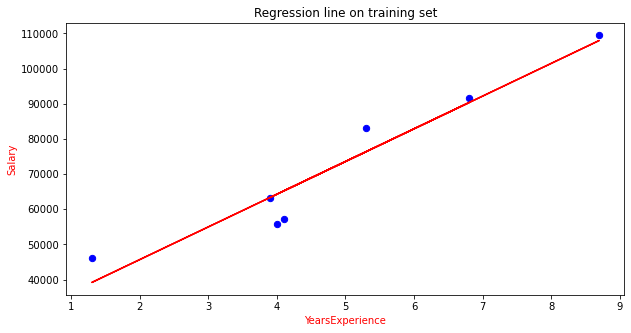

In [18]:
plt.figure(figsize=(10,5))
plt.title("Regression line on training set")
plt.xlabel('YearsExperience',fontsize=10,color='red')
plt.ylabel('Salary',fontsize=10,color='red')
plt.scatter(x_train1,y_train , s=40 ,color='blue')
plt.plot(x_train1,model.predict(x_train1),color='red')
plt.show()

In [19]:
# Predicting the Salary for the Test values
y_pred = np.round(model.predict(x_test1),decimals=2)
y_pred

array([ 47536.61,  54042.45,  64265.9 ,  68912.92,  54971.85,  45677.8 ,
       103300.9 , 124677.22,  93077.45,  61477.69, 110736.14, 116312.57,
        41030.78,  81924.59,  74489.35,  72630.54, 100512.69, 122818.41,
        56830.66,  82854.  ,  37313.16,  56830.66, 115383.17])

In [20]:
# Errors 
error = y_test-y_pred
error

array([-7645.61,  2599.55, -7308.9 , -7801.92,  5178.15, -2152.8 ,
       10511.1 , -2805.22,  5195.55, -4288.69, -5154.14, -3677.57,
       -3299.78,  -561.59, -8460.35, -4692.54,   789.31,  -427.41,
       -2385.66, 11086.  ,  2029.84,  7614.34,  1585.83])

In [21]:
# create new dataframe 
output=pd.DataFrame({'YearsExperience': x_test,'Salary':y_test , 'prediction': y_pred,'Error':error})
output.head(10)

,YearsExperience,Salary,prediction,Error
0,2.2,39891.0,47536.61,-7645.61
1,2.9,56642.0,54042.45,2599.55
2,4.0,56957.0,64265.90,-7308.90
3,4.5,61111.0,68912.92,-7801.92
4,3.0,60150.0,54971.85,5178.15
5,2.0,43525.0,45677.80,-2152.80
6,8.2,113812.0,103300.90,10511.10
7,10.5,121872.0,124677.22,-2805.22
8,7.1,98273.0,93077.45,5195.55
9,3.7,57189.0,61477.69,-4288.69


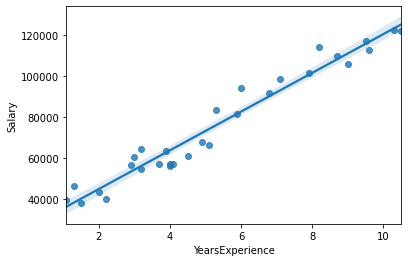

In [22]:
sns.regplot(x="YearsExperience", y="Salary", data=data);

In [23]:
# Importing metrics for the evaluation of the model
from sklearn.metrics import r2_score,mean_squared_error

In [24]:
# calculate Mean square error
mse = mean_squared_error(x_test,y_pred)
mse

6783917115.749979

In [25]:
# Calculate R square vale
rsq = r2_score(y_test,y_pred)
rsq

0.961497751599095

In [26]:
#output.to_csv(r"output.csv")